Welcome! This is the Jupyter Notebook where you can plot your data from a neutron scattering instrument using the Positionally Calibrated Prismatic Analysis method (PCPA). If you are unfamiliar with the principles of the PCPA method, please consult the paper "Monte-Carlo ray-tracing studies of multiplexed prismatic graphite analyzers for the cold-neutron triple-axis spectrometer at the High Flux Isotope Reactor." Currently, the notebook is designed only to work with the toy model and full simulations of MANTA using McStas. Before you get started, please make sure your folder with all the simulated data and your folder with the calibration data are placed in the same directory. You will also need to install the python libraries <b><u>matplotlib</b></u>, <b><u>pandas</b></u>, <b><u>scipy</b></u>, <b><u>lmfit</b></u>, <b><u>tqdm</b></u>, and <b><u>numpy</b></u>. Now, let's get started with the plotting procedure!

<p>
The first step is to define your <b>Instrument</b> object using the <i>Instrument()</i> method in the <b><u>Instrument_Creator</u></b> Module.
</p> 
<p>Your instrument will be used throughout the rest of the file to help with some of the basics of the code, such as how to calibrate the instrument properly. You can also define multiple instruments if you wish to compare the performance of different designs.</p> 
<p>Please specify the number of <b>stations</b> (currently 5, 8, or 10), the <b>mosaic</b> (currently 30, 60, or 120 in arc minutes), the <b>path</b> to the datafiles, and the whether the instrument is a <b>toy model</b> (1 angular channel of analyzers) or the <b>full instrument</b> (all 8 angular channels) with the <b>type</b> parameter.</p> 
<p>An example of an <i>Instrument()</i> is provided in the comment below. Please remember to keep the calibration data and the simulated data in <b>separate folders in the SAME directory</b>. The <b>pathBase</b> parameter will specify the location of the directory.</p>

In [1]:
##The Instrument_Creator Module contains the code for the Class of Instrument, specified using the Instrument() function
from Instrument_Creator import *

#Please define the instrument using the following format
##yourInstrument = Instrument(stations = yourStationNum, mosaic = yourMosaic, pathBase = path/to/simulations, type = "toy model")
##or yourInstrument = Instrument(stations = yourStationNum, mosaic = yourMosaic, pathBase = path/to/simulations, type = "full")
myPathBase = "D:/Users/Adit/MANTA_CAMEA/Toy_Model/"
fiveS60M = Instrument(stations = 5, mosaic = 60, pathBase = myPathBase, type = "toy model")
tenS60M = Instrument(stations = 10, mosaic = 60, pathBase = myPathBase, type = "toy model")
tenS120M = Instrument(stations = 10, mosaic = 120, pathBase = myPathBase, type = "toy model")
eightS60M = Instrument(stations = 8, mosaic = 60, pathBase = myPathBase, type = "toy model")

<p>The next step is to prepare the <b>calibration</b> for the instrument. As described in the paper, the calibration should be prepared by performing a scattering experiment on Vanadium at discrete Ei=Ef</p>

<p>The <i>calibration()</i> method will create a pixel-by-pixel map of the expected distribution of Efs. It will be used when reading the data from the experiment. Please be sure to specify the instrument object, and the folder name of the calibration--which must be <b>inside</b> the path you specified in the Instrument creation. </p>

<p> The <b><u>Calibration</u></b> module also contains a couple of techniques for plotting the calibration process. The first is contained within the <i>calibration()</i>. As a default the plotting process is inactive, but if you set <b>plot=True</b>, then a plot showing the raw data for each energy compared to a Gaussian fit is shown. By default, all energies in the calibration are plotted, but if you only want to see some of the energies, set the <b>plotVals</b> parameter equal to a list of the energies you want plotted. The x and y bounds of the plot are default autoset by the plotter, but to control the x and y bounds of the plot, pass a tuple or list to the <b>xlim</b> and <b>ylim</b> parameter. Finally the <b>saveFig</b> can be set to True to save the plot as a pdf in the same directory as specified in your <i>Instrument()</i>'s <b>pathBase</b> parameter.</p>

<p> The second plotting technique in the <b><u>Calibration</u></b> Module is the <i>pixelHistogram()</i> function, which will show the PCPA distribution of energies at a given pixel as a histogram. The <i>pixelHistogram()</i> function assumes that your calibration has already been completed, and will require your <i>Instrument()</i>, and the <i>calibration</i> as a required input. The other required input is the <b>pixel</b> you would like to plot the distribution of energies at. The other parameters, <b>xlim</b>, <b>ylim</b> and <b>saveFig</b> work the same as described in the <i>calibration()</i> method and are optional.</p>

<p>The calibration is currently very tailored to the existing 9 designs, if you create your own you will need to modify the calibration code (please refer to the comments in the Calibration.py file itself for why)</p>

sup


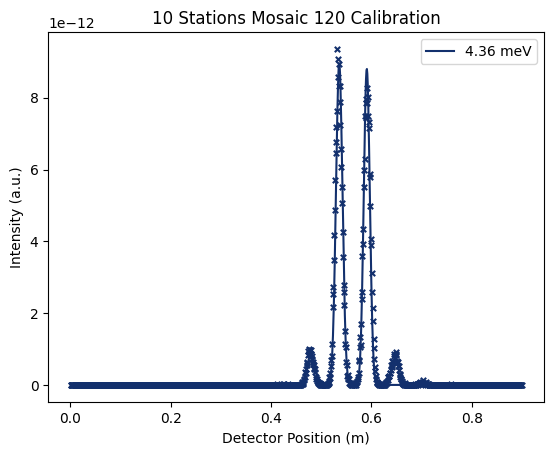

Calibration Successful!


In [4]:
## Calibration Module
from Calibration import *
## Here is an example of how to run the calibration without any plotting
## myCalibrationNoPlot = calibration(instrument = Instrument(...), folder = "calibrationFolderName", )
## Here is an example of how to run the calibration with plotting
## myCalibrationWithPlot = calibration(instrument = Instrument(...), folder = "calibrationFolderName", 
##                                   plot=True, xlim=(lowerbound, upperbound), ylim = (lowerbound, upperbound),
##                                   plotVals = [E1, E2, E3,....], saveFig = True)
## Here is an example of how to run the pixelHistogram function. As a reminder, the calibration()
## function's output must be passed as a parameter.
## pixelHistogram(instrument = Instrument(...), calibration = myCalibration, xlim = (lowerbound, upperbound)
##                  ylim =(lowerBound, upperBound), saveFig = False)


tenS120MCalibration = calibration(tenS120M, folder = f"10_Station_Mosaic_120_Calibration", plot=True, plotVals= [4.36])

#fiveS60MCalibration = calibration(fiveS60M, folder = f"5_Station_Mosaic_60_Calibration", plot=False)


#pixelHistogram(fiveS60M, fiveS60MCalibration, pixelNum=100)
#mycalibration = calibration(myInstrument, folder = f"8_Station_Mosaic_60_Calibration", plot=False, 
#                            xlim=(0.23, 0.41), ylim=None, plotVals=[3.46, 3.5, 3.54, 3.58, 3.62, 3.66, 3.72], saveFig = False)




<p>
The next step is to load all your data and prepare it for plotting. This is done with the <i>dataLoader()</i> function contained in the <u><b>DataLoader</b></u> module. The <i>dataLoader()</i> function will essentially read in all the data and use the <i>calibration()</i> function prepared in the previous step to output a <i>pandas.Dataframe()</i> that makes it easy to read and plot the data.  <i>dataLoader()</i> is the only function contained within the module.
</p>
<p>
<i>dataLoader()</i> requires your previously created <i>Instrument</i> object, your <i>calibration()</i>, and the <b>folder</b> name, which is the subdirectory where the data is held. There are no optional parameters.
</p>
<p>
This is the function with the longest runtime of the entire PCPA library. Thus a progress bar is included which keeps track of how many files <i>dataLoader()</i> has completed.
</p>

<p>
Feel free to <i>print()</i> the output of the <i>dataLoader()</i> function to see the organization of the data! Currently the <i>dataLoader()</i> function's dataframes have a variety of columns. The main ones you'll care about are <b>E</b>, the energy transfer, <b>Qx</b> and <b>Qy</b> the momentum transfer, and the <b>Intensity</b>. However, the simulation parameters for the real-space instrument (<b>Sample Angle</b>, instrument angle <b> Two Theta</b>, <b>Ei</b>, <b>Ef</b>) are also included. This can also be useful for isolating where a certain signal came from using <b><u>pandas</b></u>. Finally, <b>ki</b> and <b>kf</b>, the neutron's initial and final wavevector, are also included.
</p>

<p>
You'll note that the current plotting technique uses the neutron's momentum transfer, <b>Qx</b> and <b>Qy</b>, rather than the sample's momentum transfer in reciprocal lattice units. That's because the the current sample used for the McStas simulations has a very simple relation (effectively equivalent) relationship between the two. It shouldn't be difficult to modify the code to calculate <b>(h, k, l)</b> based off a .cif file if this code/project ever reaches that stage.
</p>

In [7]:
## Read your date using the dataLoader() function from the DataLoader Module
from DataLoader import *

## An example of how to use the dataLoader function is provided below
## myData = dataLoader(instrument = Instrument(...), calibration=calibration(...), folder = "dataFolderName")
#fiveS60MDat = dataLoader(fiveS60M, fiveS60MCalibration, folder = "5_Station_Mosaic_60")
tenS120MDat = dataLoader(tenS120M, tenS120MCalibration, folder = "10_Station_Mosaic_120")


FilesRead/TotalFiles:   0%|          | 0/8618 [00:00<?, ?it/s]

FilesRead/TotalFiles:   0%|          | 2/8618 [00:00<08:44, 16.43it/s]

all_simulations1.sh is not a folder!


FilesRead/TotalFiles: 100%|██████████| 8618/8618 [04:32<00:00, 31.65it/s] 


Toy_Model_10.c is not a folder!
Toy_Model_10.instr is not a folder!
Toy_Model_10.out is not a folder!


<p>
Now that the data is prepared, you can prepare plots using the <u><b>Plotting</u></b> Module. The <u><b>Plotting</u></b> module lets you visualize the data you prepared using the PCPA method in a variety of ways. Note that any variable named with the ending <b>Var</b>, MUST have the SAME naming conventions as the columns from the outputted <i>pandas.DataFrame</i> from <i>dataLoader()</i>.
</p>

<p>
The first function included is the <i>cut2d()</i> function, which creates a 2D scatterplot of the data according to the variables you choose in the outputted <b><u>pandas.DataFrame</b></u> from <i>dataLoader</i> with the neutron intensity as the color. The <i>cut2d()</i> function requires 7 parameters, <b>instrument</b>, which is your <i>Instrument</i> object you created previously, <b>data</b> which is your data from the <i>dataLoader()</i> function, <b>xVar</b> and <b>yVar</b>, the x and y-axis variables, <b>integrationVar</b>, the variable you're taking a "cut" of, essentially the one held constant at fixed value <b>integrationVal</b> with integration width <b>integrationWidth</b>. <b>integrationWidth</b>'s input is a float value, that will allow the data within <b>integrationVal</b> + <b>integrationWidth</b> and <b>integrationVal</b> - <b>integrationWidth</b> to remain. Note that <b>xVar</b>, <b>yVar</b>, and <b>integrationVar</b> MUST have the SAME naming conventions as the columns from the outputted <i>pandas.DataFrame</i> from <i>dataLoader()</i>. You can also again control the x, y, and colorbar-axis with the optional parameters <b>xlim</b>, <b>ylim</b>, and <b>colorBarlim</b> using tuple or list inputs. Finally, you can save the cut as a pdf by setting the <b>saveFig</b> parameter to True.
</p>

<p>
The second function included is the <i>cut1d()</i> function, which creates a 1D histogrammed plot of the data according to the variables you choose in the outputted <b><u>pandas.DataFrame</b></u> from <i>dataLoader</i> with the neutron intensity as the y-axis. The <i>cut1d()</i> function also returns the best-fit parameters of a Gaussian fitted to the data. The <i>cut1d()</i> function requires 10 parameters, <b>instrument</b>, which is your <i>Instrument</i> object you created previously, <b>data</b> which is your data from the <i>dataLoader()</i> function, <b>xVar</b> the x-axis variable you want to plot, <b>binSize</b>, the histogrammed binsize of the x-axis variable, <b>integrationVar1</b>, one of the variables you're taking a "cut" of, essentially it is held constant at fixed value <b>integrationVal1</b> with integration width <b>integrationWidth1</b>. <b>integrationWidth1</b>'s input is a float value, that will allow the data within <b>integrationVal1</b> + <b>integrationWidth1</b> and <b>integrationVal1</b> - <b>integrationWidth1</b> to be plotted. Similarly <b>integrationVar2</b>, <b>integrationVal2</b>, and <b>integrationWidth2</b> perform the same process with the second variable you'll be integrating over. The optional parameters <b>ylim</b> and <b>saveFig</b> again provide the options to control the y-axis range and whether the figure should be saved. The optional parameter <b>threshold</b> sets an intensity threshold for the Gaussian to fit and is highly recommended to avoid overfitting of noise. <b>binRange</b> provides an option to only fit within certain bounds of <b>xVar</b>, which is useful if you only want to look at a single Peak within a specific region. <b>binRange</b> also automatically controls the limits of the x-axis range. If you don't want the plot and only want the Gaussian fit (as used in the following <i>resolution()</i> function), you can set the paramter <b>showPlot</b> equal to <b>False</b>. 
</p>

<p>
The third function is the <i>resolution()</i> function, which uses the Gaussian fit output from <i>cut1D</i> to calculate (and return) how the full-width-half-maximum of the fitted Gaussian for <b>resVar</b> changes across several cuts of a specified variable <b>xVar</b>. <i>resolution()</i> will both plot the results and return the x-y coordinates as a tuple of lists ([xval1, xval2, ...], [yval1, yval2, ....]). The <i>resolution()</i> function takes in many of the same variables as <i>cut1D()</i> and will directly pass it to <i>cut1D()</i>. Overall <i>resolution()</i> requires 9 parameters: <b>instrument</b>, which is your <i>Instrument()</i> object you created previously, <b>data</b> which is your data from the <i>dataLoader()</i> function, <b>xVar</b> the x-axis variable you want to study how the resolution of <b>resVar</b> changes with <b>xVar</b>. <b>xStepSize</b> should be inputted as a float and specifies the integration size in which the resolution is calculated at a specific point at <b>xVar</b>. <b>resVar</b> is the variable for which you are calculating the resolution of at discrete intervals of <b>xVar</b>. <b>binSize</b> is the same <b>binSize</b> from <i>cut1D()</i> and lets you pick your histogram bin size during the resolution calculations. <b>integrationVar</b>, <b>integrationVal</b>, and <b>integrationWidth</b> is the variable held constant at <b>integrationVal</b> and integration bin size <b>integrationWidth</b>. The optional parameters <b>xlim</b>, <b>ylim</b> again let you control the bounds of the plot, however <b>xlim</b> will also determine the range in which the resolution is calculated, (unlike previously when it would only control your axis size) and is a recommended input. <b>showCuts</b> lets you see each Gaussian, which is useful for understanding the quality of the fits, and each cut will be saved if <b>saveCuts</b> is set to <b>True</b>. The <b>threshold</b> and <b>binRange</b> parameters are directly passed to <i>cut1D()</i>, refer to their functions in the <i>cut1D()</i> section. Finally setting <b>saveFile</b> to <b>True</b> saves the plot as a pdf in the <b>pathBase</b> directory.
</p>

<p>
The fourth and final function is <i>resolutionComp()</i>, which is used to plot a comparison of the results of <i>resolution()</i> for multiple instruments. <i>resolutionComp()</i> assumes <i>resolution()</i> has already been performed for each of the instruments. The required parameters are <b>instrumentList</b>, which is a list of the <i>Instrument</i> objects you'll be comparing, <b>resxy</b>, which is a list of the outputs of <i>resolution()</i> (e.g. [resolution(instrument1,...), resolution(instrument2,...)...]). <b>xVar</b> and <b>resVar</b>, which are the x-axis and y-axis variables you want plotted and are the same <b>xVar</b> and <b>resVar</b> passed into <i>resolution()</i>. The optional parameters are <b>xlim</b> and <b>ylim</b>, which can be inputted as a tuple to control the x-y axes' bounds, and <b>maskIndices</b>. <b>maskIndices</b> should be inputted as list of indices (e.g. [1, 4, 10]) and removes x-y points at the respective indices for ALL instruments. This is in case one point in particular is influenced by noise.
</p>

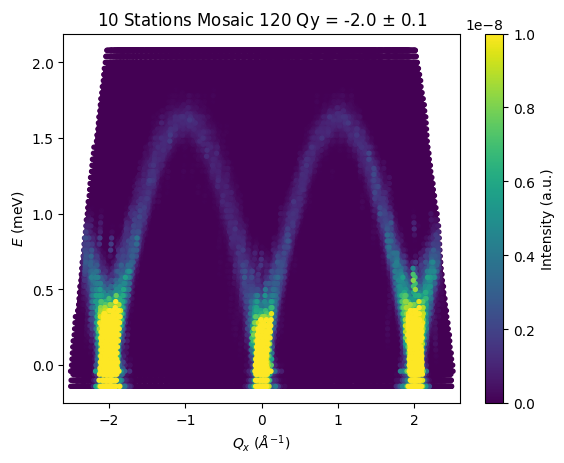

In [9]:
## First import the Plotting module, which contains the plotting functions.
from Plotting import *

## An example of each function contained within Plotting is provided below
## a cut2D() example at Qx = 0.4 
## cut2D(instrument = Instrument(...), dataframe = dataLoader(...), xVar = "Qx", yVar = "E",
##  integrationVar = "Qx", integrationVal = 0.4, integrationWidth= 0.1,
## xlim = None, ylim = (-3., 3.), colorBarLim = (0, 1e9), saveFile=False)
#print(tenS60MDat)

#cut2D(fiveS60M, fiveS60MDat, "Qy", "E", "Qx", 0., 0.1, xlim= (-2.6, 2.6), colorBarLim=(0, 1e-8))
cut2D(tenS120M, tenS120MDat, "Qx", "E", "Qy", -2., 0.1, xlim= (-2.6, 2.6), colorBarLim=(0, 1e-8))

#pixelHistogram(fiveS60M, fiveS60MCalibration, 300)


## cut1D() example that plots a Qx gaussian as a function of Qy
## gaussFit =  cut1D(instrument = Instrument(...), dataframe = dataLoader(...), xVar = "Qy",
##                          binSize = 0.1, integrationVar1 = "Qx", integrationVal1 = 0.4, 
##                          integrationWidth1 = 0.1 , integrationVar2 = "E", integrationVal2 = 1.,
##                          integrationWidth2 = 0.04, threshold = 1e-0, binRange = (-1., 1.),
##                          ylim = (lowerYBound, upperYBound), showPlot = True
##                          saveFile=False)

#myFit = cut1D(fiveS60M, fiveS60MDat, xVar = "Qx", binSize = 0.1,
#                integrationVar1 = "Qy", integrationVal1 = -2, 
#                integrationWidth1 = 0.1, integrationVar2 = "E", 
#                integrationVal2 = 1.0, integrationWidth2 = 0.04, threshold = 1e-9)


#myFit2 = cut1D(tenS60M, tenS60MDat, xVar = "Qx", binSize = 0.1,
#                integrationVar1 = "Qy", integrationVal1 = -2, 
#                integrationWidth1 = 0.1, integrationVar2 = "E", 
#                integrationVal2 = 1.0, integrationWidth2 = 0.04, threshold = 1e-9)

#myFit = cut1D(fiveS60M, fiveS60MDat, xVar = "E", binSize = 0.04,
#                integrationVar1 = "Qy", integrationVal1 = -2, 
#                integrationWidth1 = 0.1, integrationVar2 = "Qx", 
#                integrationVal2 = 1.0, integrationWidth2 = 0.1, threshold = 1e-9)

#myFit = cut1D(tenS60M, tenS60MDat, xVar = "E",  binSize = 0.04,
#                integrationVar1 = "Qy", integrationVal1 = -2, 
#                integrationWidth1 = 0.1, integrationVar2 = "Qx", 
#                integrationVal2 = 1.0, integrationWidth2 = 0.1, threshold = 1e-9)

## resolution() example that plots Energy resolution as a function of Qx
## resx, resy = resolution(instrument = Instrument(...), dataframe = dataLoader(...), 
##                          xVar = "Qx", xStepSize = 0.1, resVar = "E", binSize = 0.04,
##                          integrationVar="Qy", integrationVal = -2., integrationWidth = 0.1,
##                          xlim = (0, 2), ylim = None, showCuts = False, saveCuts = False,
##                          saveFile = True)

#resolution5 = resolution(fiveS60M, fiveS60MDat, "Qx", 0.1, "E", 0.04, "Qy", -2., 0.1,
#                         threshold = 1e-9, xlim = (-1, 1), ylim = (0, 0.45))
#resolution10 = resolution(tenS60M, tenS60MDat, "Qx", 0.1, "E", 0.04, "Qy", -2., 0.1,
#                         threshold = 1e-9, xlim = (-1., 1.), ylim = (0, 0.45))


#resolution(myInstrument, myData, "Qy", -2, 0.1, "Qx", (0.2, 1.5), 0.1, "E", 0.1, threshold = 1e-9,
#            showCuts=False)
##resolutionComp example that plots Energy resolution as a function of Qx for 2 different instruments



## 
## 
##resolution1 = resolution(instrument = Instrument(instrument1params), dataframe = dataLoader(instrument1params) 
##                          xVar = "Qx", xStepSize = 0.1, resVar = "E", binSize = 0.04,
##                          integrationVar="Qy", integrationVal = -2., integrationWidth = 0.1,
##                          xlim = (0, 2), ylim = None, showCuts = False, saveCuts = False,
##                          saveFile = True)
##
## resolution2 = resolution(instrument = Instrument(instrument2params), dataframe = dataLoader(instrument2params) 
##                          xVar = "Qx", xStepSize = 0.1, resVar = "E", binSize = 0.04,
##                          integrationVar="Qy", integrationVal = -2., integrationWidth = 0.1,
##                          xlim = (0, 2), ylim = None, showCuts = False, saveCuts = False,
##                          saveFile = True)

## resolutionComp(instrumentList = [Instrument(instrument1params), Instrument(instrument2params)],
##                resxy = [resolution1, resolution2],xVar = "Qx", resVar = "E", xlim = (0, 2),
##                ylim = (0, 0.4), maskIndices = [20, 21, 22] )


#resolutionComp([fiveS60M, tenS60M], [resolution5, resolution10], xVar = "Qx", resVar = "E", maskIndices = [15, 16])
#resolutionComp([fiveS60M], [resolution5], xVar = "Qx", resVar = "E", maskPoints=[0])


In [5]:
from Instrument_Creator import *
from Calibration import *
from DataLoader import *
from Plotting import *

manta = Instrument(stations = 8, mosaic = 60, pathBase = "D:/Users/Adit/MANTA_CAMEA/Toy_Model/", type = "full")
mantaCalibration = calibration(manta, folder = "MANTA_Front-End_Calibration/8_Station" )
manta = Instrument(stations = 8, mosaic = 60, pathBase = "D:/Users/Adit/MANTA_CAMEA/Full_MANTA/", type = "full")
mantaData = dataLoader(manta, mantaCalibration, folder = "Official_Results")



another change
Could not find the file Ei-3.3!
Could not find the file Ei-3.34!
Could not find the file Ei-3.7!
Calibration Successful!
          -0.449561      -0.448682      -0.447803      -0.446924  \
3.13   9.996365e-01   9.996045e-01   9.995696e-01   9.995315e-01   
3.17   3.635270e-04   3.954979e-04   4.304006e-04   4.685141e-04   
3.21   1.105729e-09   1.441846e-09   1.878935e-09   2.446957e-09   
3.25   8.420170e-13   1.146105e-12   1.559923e-12   2.123037e-12   
3.29   1.472578e-21   2.594388e-21   4.564194e-21   8.017994e-21   
3.33   3.832014e-30   8.332301e-30   1.807595e-29   3.912332e-29   
3.38  7.136379e-111  4.189082e-110  2.457423e-109  1.440659e-108   
3.42  1.978826e-119  1.269966e-118  8.145187e-118  5.220767e-117   
3.46  9.479676e-134  7.436839e-133  5.827638e-132  4.561480e-131   
3.50  7.139153e-153  7.334220e-152  7.520676e-151  7.697604e-150   
3.54  4.897811e-215  1.443228e-213  4.228446e-212  1.231799e-210   
3.58  2.551592e-297  7.468482e-296  2.183915e-29

FilesRead/TotalFiles: 100%|██████████| 3772/3772 [07:04<00:00,  8.88it/s]


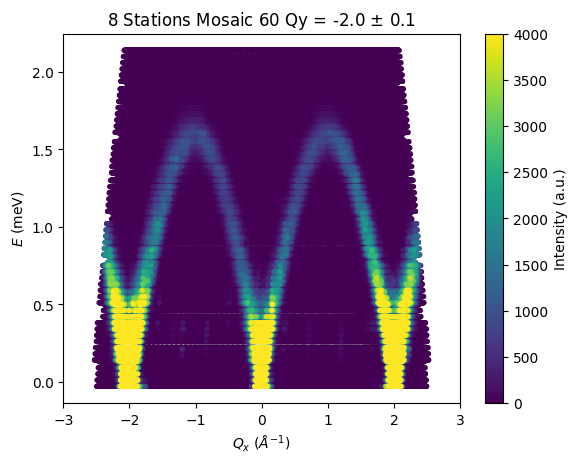

In [7]:

cut2D(manta, mantaData, "Qx", "E", "Qy", -2., 0.1, colorBarLim=(0,4e3), xlim=(-3,3))
